<a href="https://colab.research.google.com/github/ArtemOsokin/psskad_mgpu_course/blob/main/PW/PW3/PW_03_Osokin_A_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 3. Программные средства консолидации данных

## Цель работы
Освоить практические навыки консолидации данных из различных источников с использованием Python и библиотеки pandas.

## Задачи
1. Загрузить данные из различных источников (CSV, Excel, JSON).
2. Провести предварительную обработку и очистку данных.
3. Объединить данные из разных источников.
4. Выполнить агрегацию и трансформацию данных.
5. Сохранить консолидированные данные в новый файл.

## Необходимое программное обеспечение
- Python 3.x
- Библиотеки: pandas, numpy, matplotlib

## Исходные данные
- `buyers.csv`: данные о покупателях интернет-магазина (имя, город, покупки).
- `orders.xlsx`: данные о заказах (номер заказа, товар, сумма).
- `ships.json`: данные о доставке и её стоимости по городам

##Задача:
объединить данные и рассчитать общую стоимость заказов для
каждого клиента с учётом доставки.

## Ход работы

Процесс создания тестовых данных для файлов
- `buyers.csv`
- `orders.xlsx`
- `ships.json`


In [1]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import random


In [2]:
# Функция для генерации случайной даты
def random_date(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds()))
    )

In [3]:
# Функция для генерации случайного продукта
def random_product():
    return random.choice(['Laptop', 'Smartphone', 'Tablet', 'Monitor', 'Keyboard'])

1. Создание ships.json:


In [4]:
# Генерация данных о доставке
cities = ['Москва', 'Санкт-Петербург', 'Казань', 'Самара', 'Сочи', 'Пермь']
ships = [
    {
        'city': city,
        'shipping_cost': random.randint(500, 3500)
    }
    for city in cities
]
file_name = 'ships.json'

# Сохранение данных о продуктах в JSON
with open(file_name, 'w', encoding='utf-8') as f:
    json.dump(ships, f, ensure_ascii=False, indent=4)

print("Файл {} создан".format(file_name))


Файл ships.json создан


2. Создание buyers_2022.csv:


In [5]:
# Генерация данных о продажах за 2022 год
names = [
    'Grace James',
    'Cora Christian',
    'Sammy Griffith',
    'Bo Carr',
    'Bart Sanchez',
    'Natalia Stokes',
    'Kenneth Blankenship',
    'Vanessa Berry',
    'Marietta Spears',
    'Mckinley Rocha'
]

buyers = [
    {
        'name': name,
        'city': random.choice(cities)
    }
    for name in names
]

file_name = 'buyers.csv'

df_2022 = pd.DataFrame(buyers)
df_2022.to_csv(file_name, index=False)
print("Файл {} создан".format(file_name))


Файл buyers.csv создан


3. Создание sales_2023.xlsx:


In [6]:
# Генерация данных о заказах
orders = [
    {
        'buyer_name': random.choice(names),
        'order_id': f'O{i:03d}',
        'product': random_product(),
        'price': round(random.uniform(1000, 10000), 2)
    }
    for i in range(1000)
]

file_name = 'orders.xlsx'

df_2023 = pd.DataFrame(orders)

df_2023.to_excel(file_name, index=False)
print("Файл {} создан".format(file_name))


Файл orders.xlsx создан


In [7]:
ls

buyers.csv   sales_by_category.png  ships.json
orders.xlsx  sample_data/           total_sales_by_client_data.csv


Особенности сгенерированных данных:
- Данные имеют реалистичную структуру и вариативность.
- В данных присутствуют различные типы полей: строковые (категории, ID), числовые (цены, количество).

### Шаг 1: Подготовка рабочей среды

1. Создайте новый Python-скрипт `data_consolidation.py`.
2. Импортируйте необходимые библиотеки:



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Шаг 2: Загрузка данных
1. Загрузите данные из CSV-файла:

In [9]:
buyers_df = pd.read_csv('buyers.csv')
print("Данные о покупателях:")
print(buyers_df.head())

Данные о покупателях:
             name             city
0     Grace James  Санкт-Петербург
1  Cora Christian           Самара
2  Sammy Griffith             Сочи
3         Bo Carr           Москва
4    Bart Sanchez           Самара


2. Загрузите данные из Excel-файла:

In [10]:
orders_df = pd.read_excel('orders.xlsx')
print("Данные о покупателях:")
print(orders_df.head())

Данные о покупателях:
            buyer_name order_id  product    price
0         Bart Sanchez     O000   Laptop  1960.96
1      Marietta Spears     O001   Tablet  7349.48
2  Kenneth Blankenship     O002  Monitor  3753.11
3       Sammy Griffith     O003   Laptop  6386.92
4      Marietta Spears     O004  Monitor  4025.35


3. Загрузите данные из JSON-файла:

In [11]:
df_ships = pd.read_json('ships.json')
print("\nДанные о доставке:")
print(df_ships.head())


Данные о доставке:
              city  shipping_cost
0           Москва           1406
1  Санкт-Петербург           1226
2           Казань            830
3           Самара           2011
4             Сочи            766


### Шаг 3: Предварительная обработка и очистка данных
1. Проверьте наличие пропущенных значений:

In [12]:
print("\nПропущенные значения:")
print(buyers_df.isnull().sum())
print(orders_df.isnull().sum())
print(df_ships.isnull().sum())


Пропущенные значения:
name    0
city    0
dtype: int64
buyer_name    0
order_id      0
product       0
price         0
dtype: int64
city             0
shipping_cost    0
dtype: int64


### Шаг 4: Объединение данных
1. Объедините данные о продажах за 2022 и 2023 годы:

In [13]:
buyers_with_shipping = pd.merge(buyers_df, df_ships, how='left', on='city')
print("\nОбъединенные данные о доставке и покупателях:")
print(buyers_with_shipping.head())


Объединенные данные о доставке и покупателях:
             name             city  shipping_cost
0     Grace James  Санкт-Петербург           1226
1  Cora Christian           Самара           2011
2  Sammy Griffith             Сочи            766
3         Bo Carr           Москва           1406
4    Bart Sanchez           Самара           2011


2. Добавьте информацию о заказах к данным о доставке и покупателях:

In [14]:
final_df = pd.merge(buyers_with_shipping, orders_df, how='left', left_on='name', right_on='buyer_name')
print("\nКонсолидированные данные:")
print(final_df.head())


Консолидированные данные:
          name             city  shipping_cost   buyer_name order_id  \
0  Grace James  Санкт-Петербург           1226  Grace James     O012   
1  Grace James  Санкт-Петербург           1226  Grace James     O018   
2  Grace James  Санкт-Петербург           1226  Grace James     O030   
3  Grace James  Санкт-Петербург           1226  Grace James     O032   
4  Grace James  Санкт-Петербург           1226  Grace James     O046   

      product    price  
0      Laptop  5282.62  
1    Keyboard  2674.06  
2    Keyboard  3708.31  
3      Tablet  8848.81  
4  Smartphone  5292.14  


### Шаг 5: Агрегация и трансформация данных
1. Рассчитайте общую стоимость заказа с учетом стоимости доставки:

In [15]:
final_df['Total_Cost'] = final_df['price'] + final_df['shipping_cost']
print(final_df.head())

          name             city  shipping_cost   buyer_name order_id  \
0  Grace James  Санкт-Петербург           1226  Grace James     O012   
1  Grace James  Санкт-Петербург           1226  Grace James     O018   
2  Grace James  Санкт-Петербург           1226  Grace James     O030   
3  Grace James  Санкт-Петербург           1226  Grace James     O032   
4  Grace James  Санкт-Петербург           1226  Grace James     O046   

      product    price  Total_Cost  
0      Laptop  5282.62     6508.62  
1    Keyboard  2674.06     3900.06  
2    Keyboard  3708.31     4934.31  
3      Tablet  8848.81    10074.81  
4  Smartphone  5292.14     6518.14  


2. Рассчитайте общую стоимость всех заказов с учетом стоимости доставки для каждого клиента:

In [16]:
df_total = final_df.groupby('name')['Total_Cost'].sum()
df_total

,Total_Cost
name,
Bart Sanchez,584543.32
Bo Carr,690758.33
Cora Christian,672851.28
Grace James,635034.69
Kenneth Blankenship,868606.68
Marietta Spears,837559.66
Mckinley Rocha,640613.84
Natalia Stokes,712148.84
Sammy Griffith,725579.35


### Шаг 6: Визуализация данных
1. Создайте график продаж по категориям:

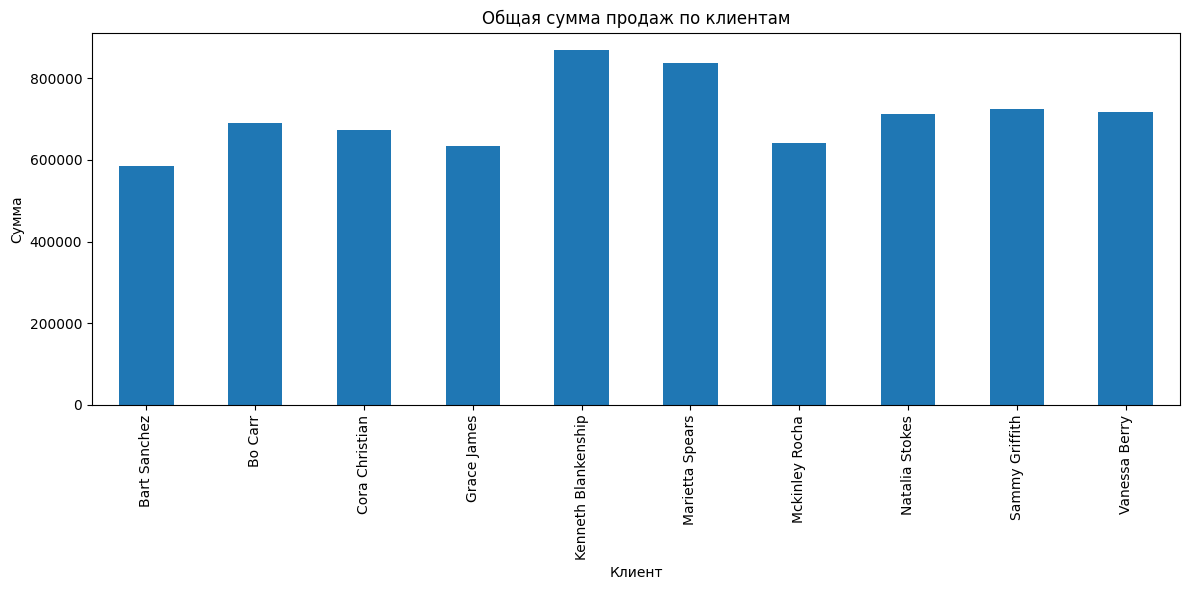

In [17]:
plt.figure(figsize=(12, 6))
df_total.plot(kind='bar')
plt.title('Общая сумма продаж по клиентам')
plt.xlabel('Клиент')
plt.ylabel('Сумма')
plt.tight_layout()
plt.savefig('sales_by_category.png')


### Шаг 7: Сохранение консолидированных данных
Сохраните консолидированные данные в CSV-файл:

In [18]:
file_name = 'total_sales_by_client_data.csv'

df_total.to_csv(file_name)
print(f"\nКонсолидированные данные сохранены в файл '{file_name}'")


Консолидированные данные сохранены в файл 'total_sales_by_client_data.csv'


In [19]:
from google.colab import files

# Скачиваем CSV файл
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>